<h1 style="text-align:center;">Iris Dataset Classification using AdaBoost</h1>
<p style="text-align:center;">By Raj Chandravanshi</p>

## Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

## Introduction
This project applies the AdaBoost algorithm and ANN Model to classify the Iris dataset. 

## Table of Contents
- [Dataset Description](#dataset-description)
- [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
- [Feature Engineering](#feature-engineering)
- [Model Training](#model-training)
- [Model Evaluation](#model-evaluation)
- [Custom AdaBoost Implementation](#custom-adaboost-implementation)
- [Artificial Neural Network (ANN) Model](#Artificial-Neural-Network-(ANN)-Model)

# <a id = 1>Dataset Description</a>
The Iris dataset contains 150 observations of iris flowers, with the following features:
- **SepalLengthCm**
- **SepalWidthCm**
- **PetalLengthCm**
- **PetalWidthCm**
- **Species** (Target variable with three classes: *Iris-setosa*, *Iris-versicolor*, *Iris-virginica*)


In [2]:
# read the dataset
df = pd.read_csv("Iris.csv")

In [3]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
4,5,5.0,3.6,1.4,0.2,Iris-setosa
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
46,47,5.1,3.8,1.6,0.2,Iris-setosa
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
131,132,7.9,3.8,6.4,2.0,Iris-virginica


In [4]:
# Cheacking Datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Summary statistics for numerical features
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Droping Note needed Columns
df = df.drop(columns="Id")

# <a id = 2> Exploratory Data Analysis (EDA)</a>

In [7]:
# Check for missing values
print(df.isnull().sum())


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


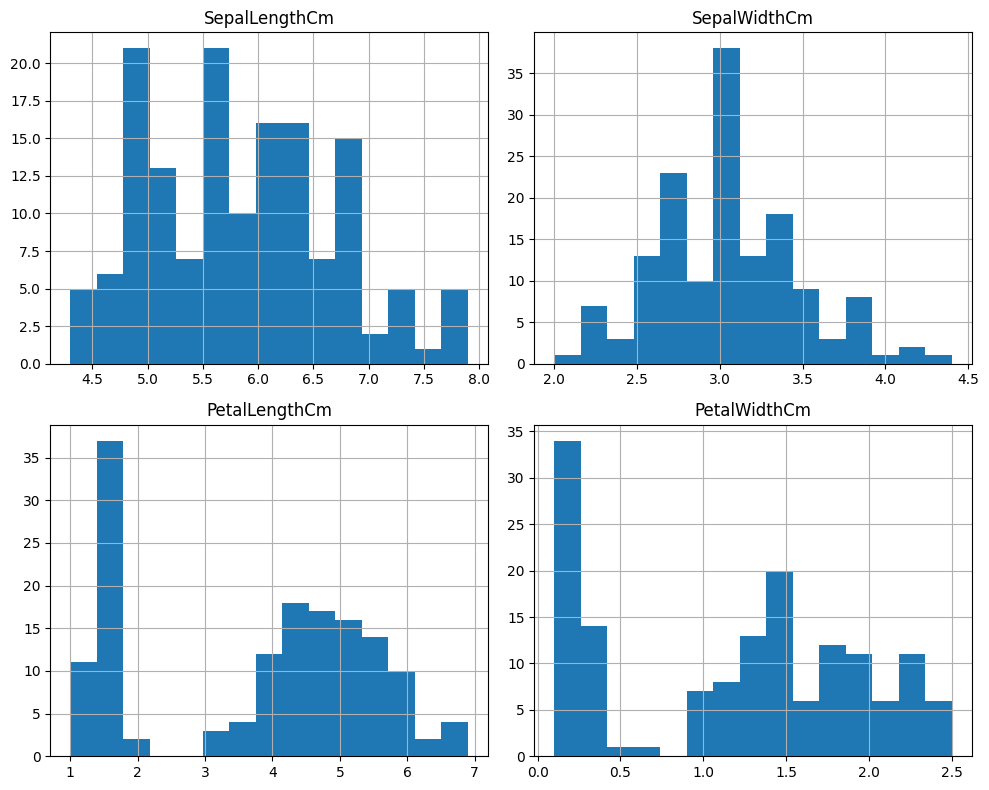

In [8]:
# Histogram of the all Inpurt Columns
df.drop('Species', axis=1).hist(figsize=(10, 8), bins=15)
plt.tight_layout()
plt.show()

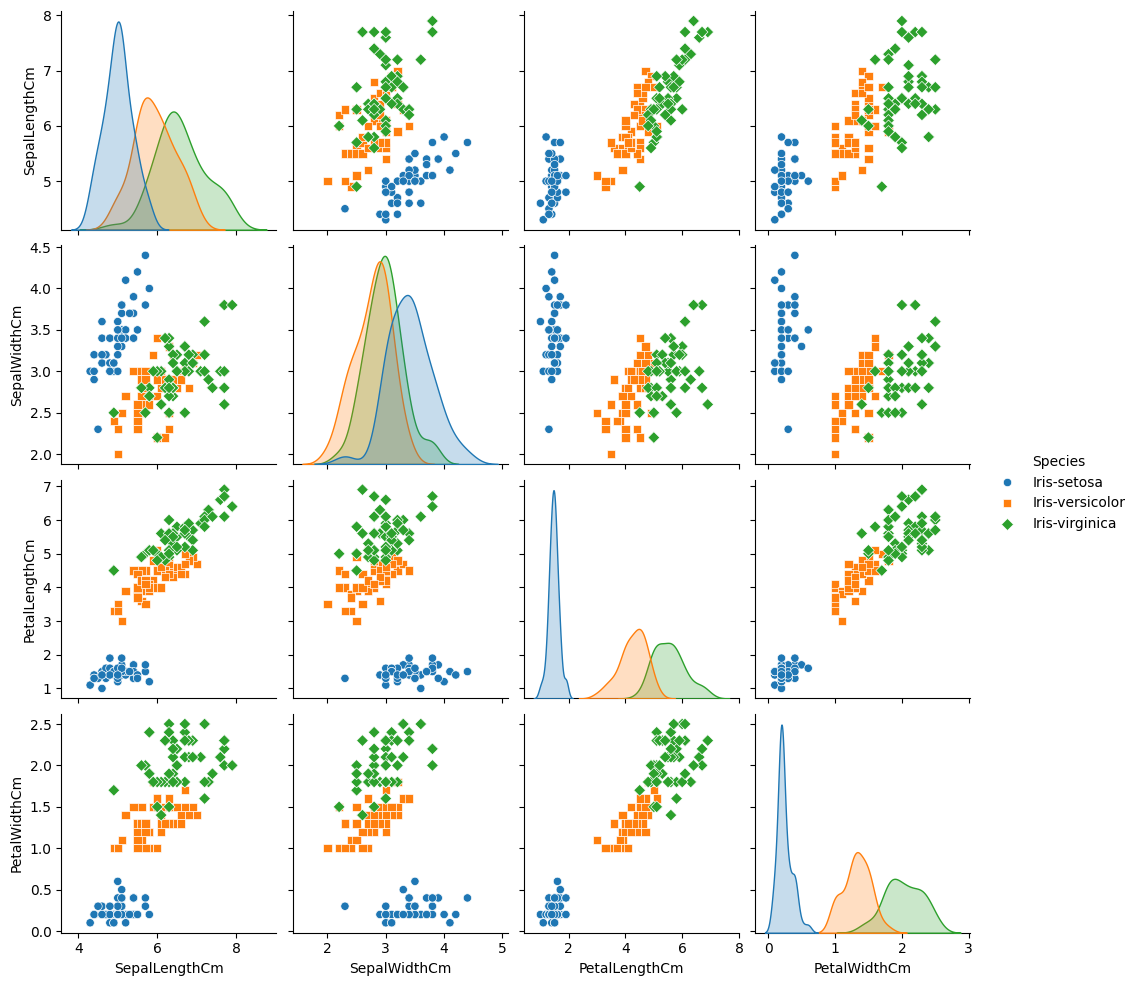

In [9]:
# Pairplot of the iris dataset
sns.pairplot(df, hue="Species", diag_kind="kde", markers=["o", "s", "D"])
plt.show()

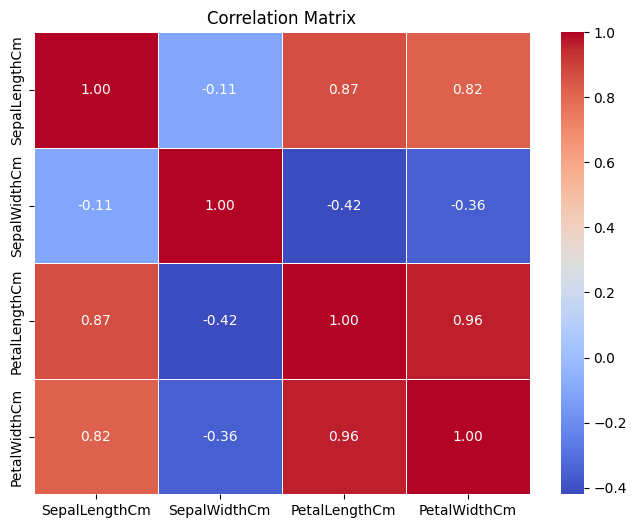

In [10]:
# Correlation matrix for the numerical features
correlation_matrix = df.drop('Species', axis=1).corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

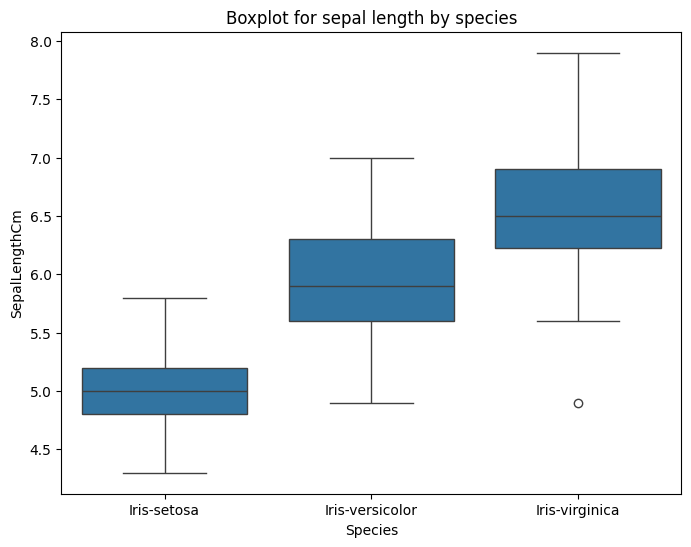

In [11]:
# Boxplot for sepal length by species
plt.figure(figsize=(8, 6))
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Boxplot for sepal length by species')
plt.show()

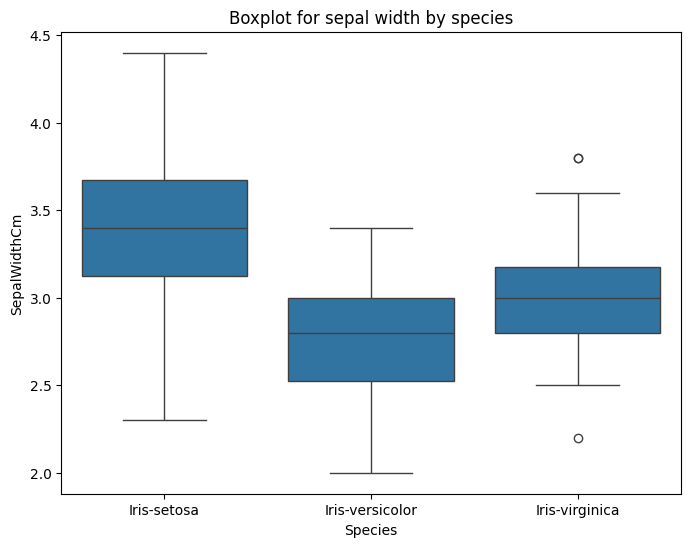

In [12]:
# Boxplot for sepal width by species
plt.figure(figsize=(8, 6))
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.title('Boxplot for sepal width by species')
plt.show()


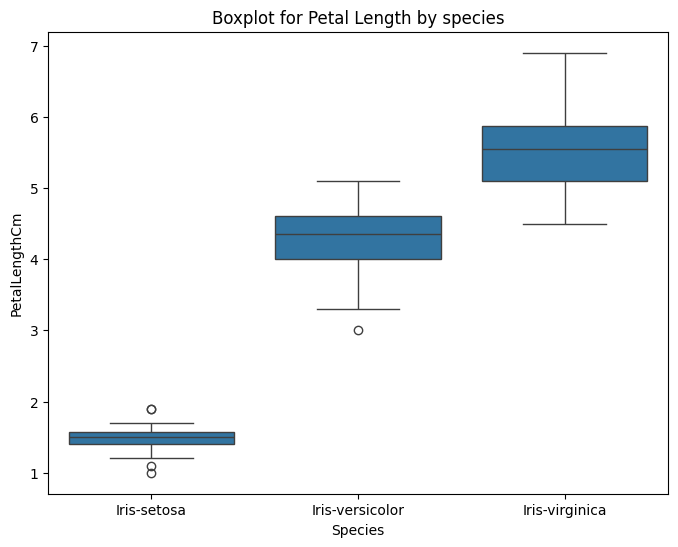

In [13]:
# Boxplot for Petal Length by species
plt.figure(figsize=(8, 6))
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Boxplot for Petal Length by species')
plt.show()

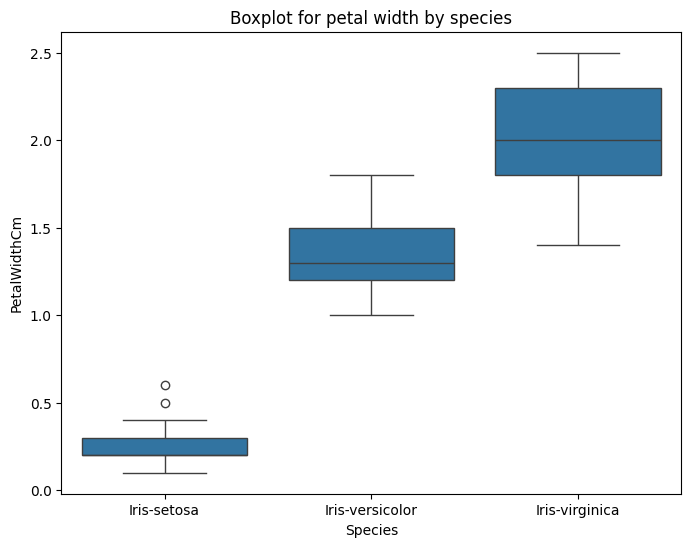

In [14]:
# Boxplot for petal width by species
plt.figure(figsize=(8, 6))
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.title('Boxplot for petal width by species')
plt.show()

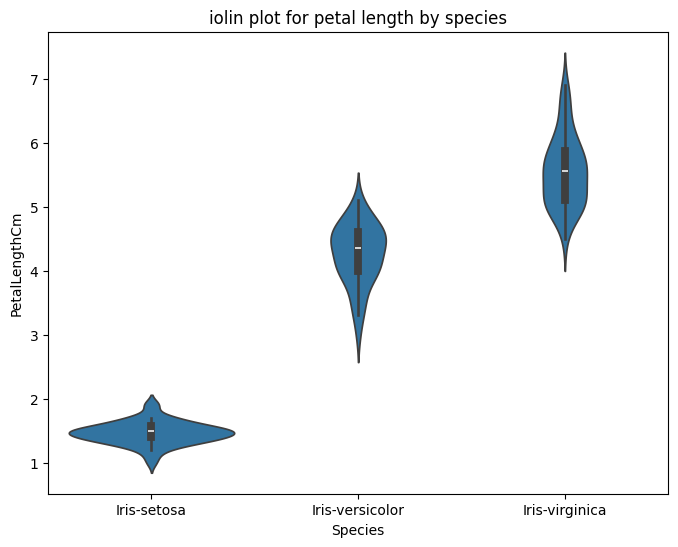

In [15]:
# Violin plot for petal length by species
plt.figure(figsize=(8, 6))
sns.violinplot(x='Species', y='PetalLengthCm', data=df)
plt.title('iolin plot for petal length by species')
plt.show()

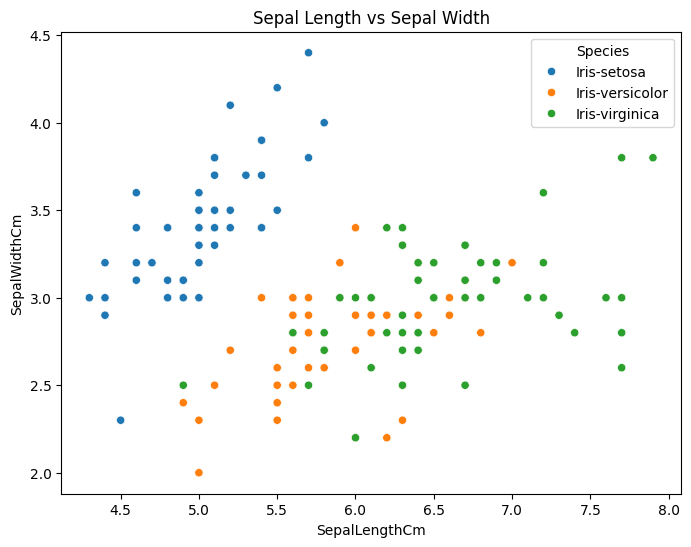

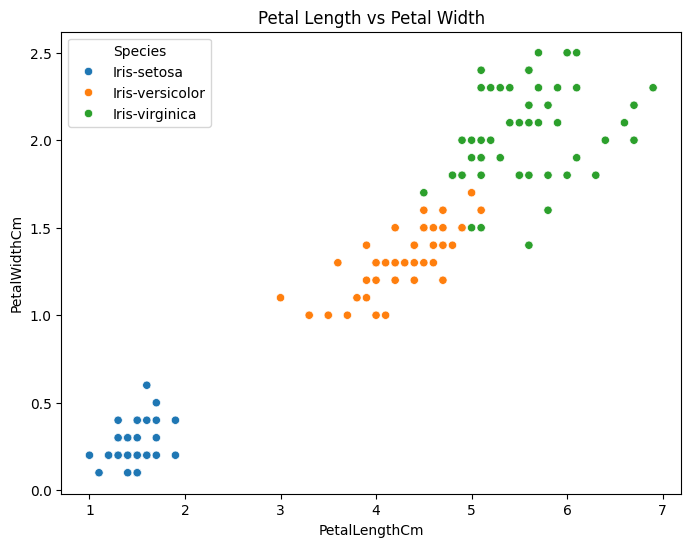

In [16]:
# Scatterplot to check for outliers (Sepal Length vs Sepal Width)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)
plt.title('Sepal Length vs Sepal Width')
plt.show()

# Scatterplot for Petal Length vs Petal Width
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)
plt.title('Petal Length vs Petal Width')
plt.show()

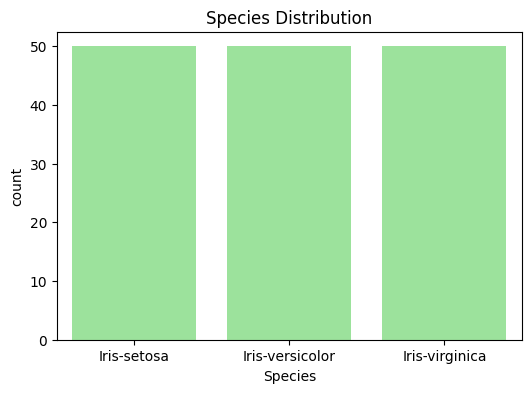

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [17]:
# Countplot to visualize the distribution of species
plt.figure(figsize=(6, 4))
sns.countplot(x='Species', data=df, color="lightgreen")
plt.title('Species Distribution')
plt.show()
print(df["Species"].value_counts())


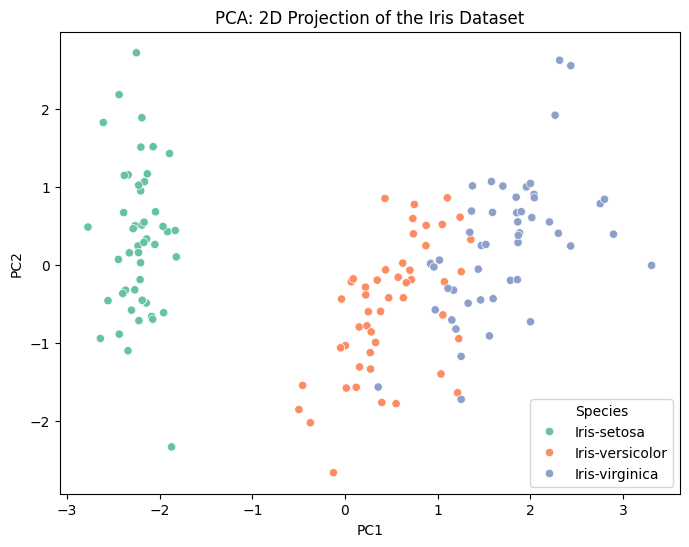

In [18]:
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
X = df.drop('Species', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Species'] = df['Species']

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Species', data=pca_df, palette='Set2')
plt.title('PCA: 2D Projection of the Iris Dataset')
plt.show()


# <a id = 3>Feature Engineering </a>

In [19]:
# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,[0,1,2,3,]], df.iloc[:,-1],test_size = .20, random_state = 12)

In [20]:
print("Shape of the traing dataset : ",X_train.shape)
print("Shape of the test dataset : ",X_test.shape)

Shape of the traing dataset :  (120, 4)
Shape of the test dataset :  (30, 4)


In [21]:
# Converting the Categorical columns in Numerical Columns
label_encoder = LabelEncoder()
y_encoded_train = label_encoder.fit_transform(y_train)
y_encoded_test = label_encoder.fit_transform(y_test)

In [22]:
# Colnverting the dataset in Standard Scale

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), ["SepalLengthCm","SepalWidthCm", "PetalLengthCm",	"PetalWidthCm"])
    ]
)

# <a id = 4> Model Training </a>

In [23]:
# Set our base model or estimator for adaboost
base_estimator = DecisionTreeClassifier(max_depth=1)

In [24]:
# creating the object of AdaBoostClassifier
Ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

In [25]:
# Creating a pipline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('adaboost', Ada)  # AdaBoost model
])


In [26]:
# fit the model
pipeline.fit(X_train, y_encoded_train)

/opt/anaconda3/envs/venv2/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['SepalLengthCm',
                                                   'SepalWidthCm',
                                                   'PetalLengthCm',
                                                   'PetalWidthCm'])])),
                ('adaboost',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                    random_state=42))])

In [27]:
# Calculting the y_pred on test data
y_pred = pipeline.predict(X_test)

# <a id = 5>Model Evaluation </a>

In [28]:
print("Accuracy using Scikit-learn Library:", accuracy_score(y_encoded_test, y_pred))

Accuracy using Scikit-learn Library: 0.9333333333333333


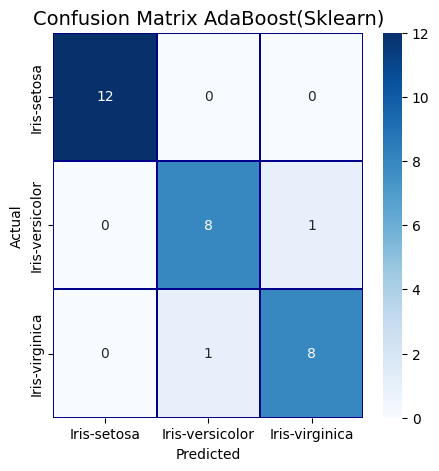

In [29]:
# Confusion Matrix
cm = pd.crosstab(y_encoded_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix AdaBoost(Sklearn)', fontsize=14)
plt.show()

# <a id = 6>AdaBoost Class </a>

In [30]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.tree import DecisionTreeClassifier

class AdaBoostMulticlass(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=None, n_estimators=50):
        self.base_estimator = base_estimator or DecisionTreeClassifier(max_depth=1)
        self.n_estimators = n_estimators
        self.models = []  
        self.alphas = [] 
    
    def fit(self, X, y):
        n_samples, n_classes = len(y), len(np.unique(y))
        self.classes_ = np.unique(y)  # Unique classes
        y_encoded = np.zeros((n_samples, n_classes))
        y_encoded[np.arange(n_samples), y] = 1  # One-hot encoding
        
        # Initialize weights
        w = np.ones(n_samples) / n_samples

        for _ in range(self.n_estimators):
            # Train a weak classifier
            model = self._clone_base_estimator()
            model.fit(X, y, sample_weight=w)
            y_pred = model.predict(X)

            # Misclassification error
            incorrect = (y_pred != y)
            err = np.sum(w * incorrect) / np.sum(w)

            if err >= 1 - 1 / n_classes:
                break

            # Compute alpha (classifier weight)
            alpha = np.log((1 - err) / (err + 1e-10)) + np.log(n_classes - 1)
            self.alphas.append(alpha)
            self.models.append(model)

            # Update sample weights
            w *= np.exp(alpha * incorrect)
            w /= np.sum(w)  # Normalize weights

    def predict(self, X):
        # Sum predictions weighted by alpha
        pred = np.zeros((X.shape[0], len(self.classes_)))
        for alpha, model in zip(self.alphas, self.models):
            pred[np.arange(X.shape[0]), model.predict(X)] += alpha
        return self.classes_[np.argmax(pred, axis=1)]

    def _clone_base_estimator(self):
        return self.base_estimator.__class__(**self.base_estimator.get_params())


In [31]:
ada = AdaBoostMulticlass(n_estimators=50)
ada.fit(X_train, y_encoded_train)

In [32]:
import warnings
warnings.filterwarnings("ignore")

y_pred2 = ada.predict(X_test)
accuracy = accuracy_score(y_encoded_test, y_pred)
print("Accuracy using AdaboostMultiClass class :", accuracy_score(y_encoded_test, y_pred2))

Accuracy using AdaboostMultiClass class : 0.9333333333333333


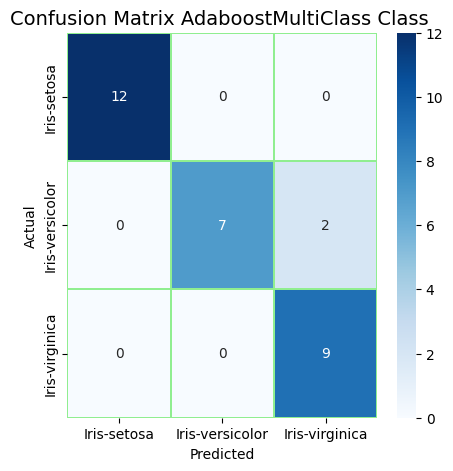

In [33]:
cm = pd.crosstab(y_encoded_test, y_pred2, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="lightgreen", cmap="Blues")
plt.title('Confusion Matrix AdaboostMultiClass Class ', fontsize=14)
plt.show()

# <a id = 7>Artificial Neural Network (ANN) Model </a>

In [34]:
scale = StandardScaler()
X_train_norm = scale.fit_transform(X_train)
X_test_norm = scale.transform(X_test)

In [35]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
model = Sequential()

model.add(Dense(128, kernel_initializer="he_normal", activation='relu', input_dim = 4))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(64, kernel_initializer="he_normal", activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(32, kernel_initializer="he_normal", activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(3, activation='softmax'))

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,971 (46.76 KB)

 Trainable params: 11,523 (45.01 KB)

 Non-trainable params: 448 (1.75 KB)

In [38]:
callback = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.0001,
    patience = 20,
    verbose = 0,
    restore_best_weights=True
)

In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(
    X_train_norm, y_encoded_train, 
    epochs=200, 
    validation_data=(X_test_norm, y_encoded_test), 
    callbacks=[callback]  
)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3769 - loss: 1.3772 - val_accuracy: 0.2333 - val_loss: 1.0494
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5123 - loss: 1.1097 - val_accuracy: 0.5333 - val_loss: 0.7681
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5410 - loss: 1.0408 - val_accuracy: 0.6333 - val_loss: 0.6086
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6673 - loss: 0.7092 - val_accuracy: 0.6667 - val_loss: 0.5259
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7083 - loss: 0.7606 - val_accuracy: 0.7667 - val_loss: 0.4752
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8329 - loss: 0.4951 - val_accuracy: 0.8000 - val_loss: 0.4480
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7015 - loss: 0.6563 - val_accuracy: 0.8000 - val_loss: 0.4300
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8317 - loss: 0.4488 - val_accuracy: 0.8000 - val_loss: 0.4135

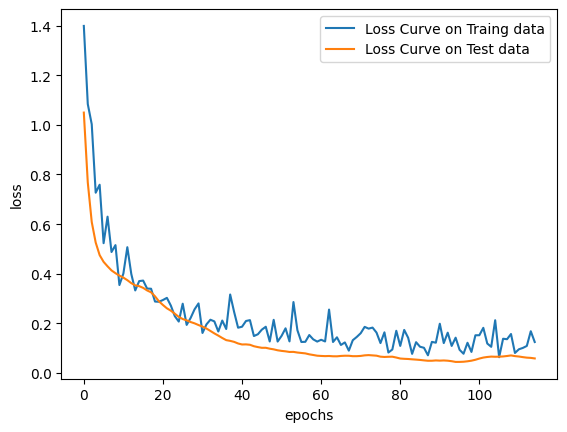

In [41]:
plt.plot(history.history["loss"], label = "Loss Curve on Traing data")
plt.plot(history.history["val_loss"], label = "Loss Curve on Test data")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

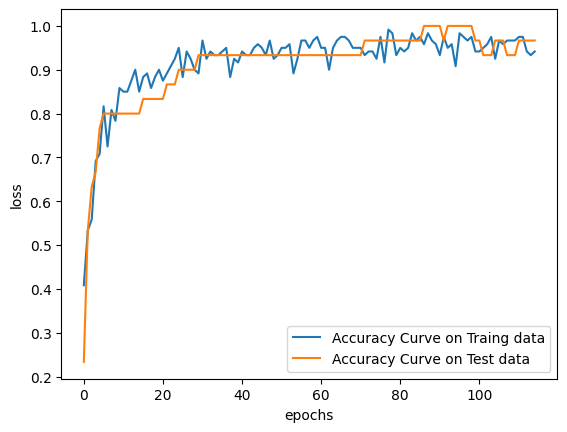

In [42]:
plt.plot(history.history["accuracy"], label = "Accuracy Curve on Traing data")
plt.plot(history.history["val_accuracy"], label = "Accuracy Curve on Test data")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()